In [1]:
from testing_ad import *
import matplotlib.pyplot as plt

In [2]:
simulate = lambda n, N, dist: compute_adstat(dist.rvs((n, N)), dist.cdf, sorted_sample=False)

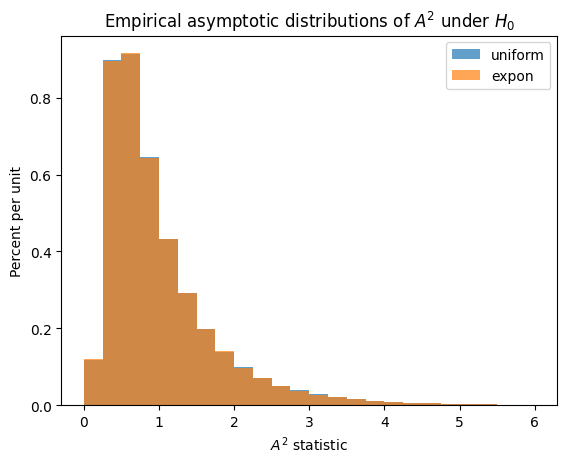

In [3]:
dist1 = scipy.stats.uniform()
dist2 = scipy.stats.expon()

bins = np.arange(0, 6.1, .25)
for dist in [dist1, dist2]:
    statistics = simulate(100, 10**6, dist)
    plt.hist(statistics, density=True, bins=bins, alpha=.7, label=dist.dist.name)
plt.xlabel(r'$A^2$ statistic')
plt.ylabel('Percent per unit')
plt.title(r'Empirical asymptotic distributions of $A^2$ under $H_0$')
plt.legend()
plt.show()

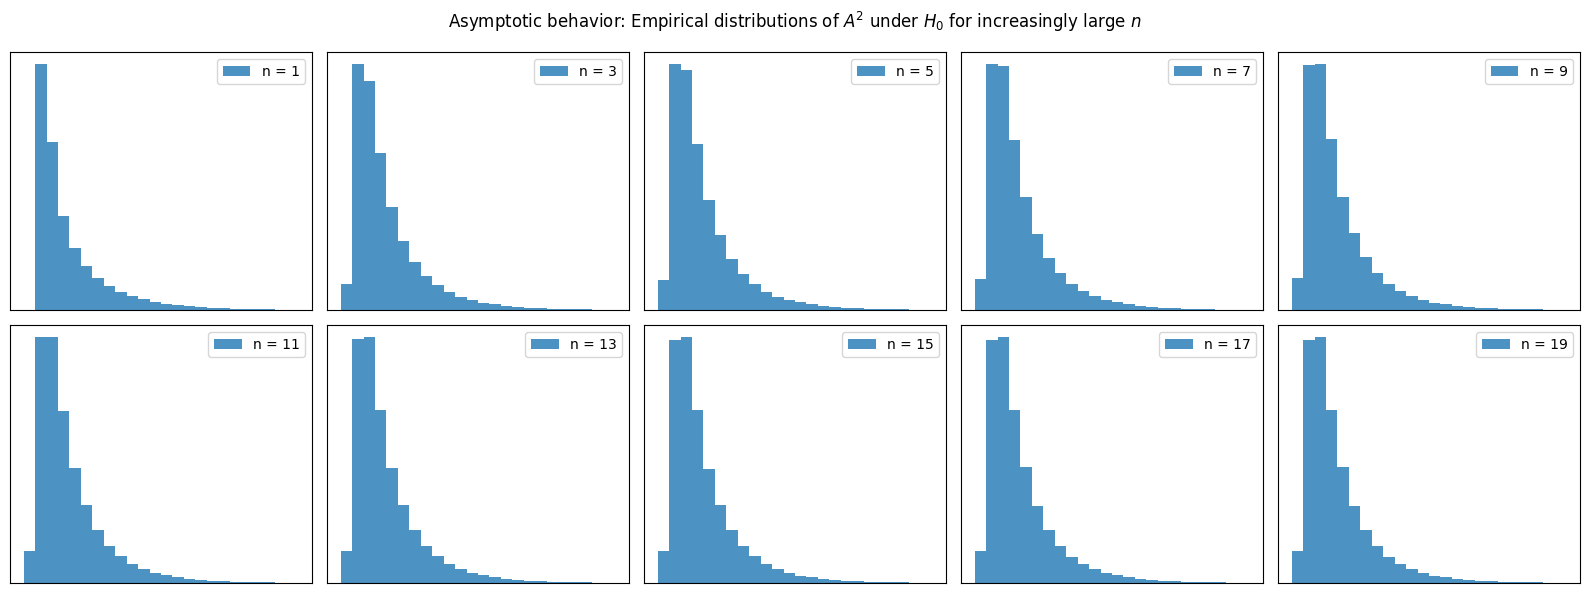

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(16, 6))
for ax, n in zip(axs.flatten(), range(1, 20, 2)):
    statistics = simulate(n, 10**6, dist1)
    ax.hist(statistics, density=True, bins=bins, alpha=.8, label=f'{n = }')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend()
plt.suptitle(r'Asymptotic behavior: Empirical distributions of $A^2$ under $H_0$ for increasingly large $n$')
plt.tight_layout()
plt.show()

In [5]:
statistics = simulate(100, 10**6, dist1)
np.mean(statistics)

np.float64(0.999648712920175)

In [6]:
# compare to known numeric value
print(1 - ad_asymptotic_cdf(10, 5))
print(1 - 0.999986184964589314168018038088) # https://doi.org/10.18637/jss.v009.i02

1.3815035410646992e-05
1.3815035410646992e-05


In [7]:
# compare to empirical cdf
print(1 - ad_asymptotic_cdf(3, 5))
print(np.mean(statistics > 3))

0.027364788334026335
0.027497


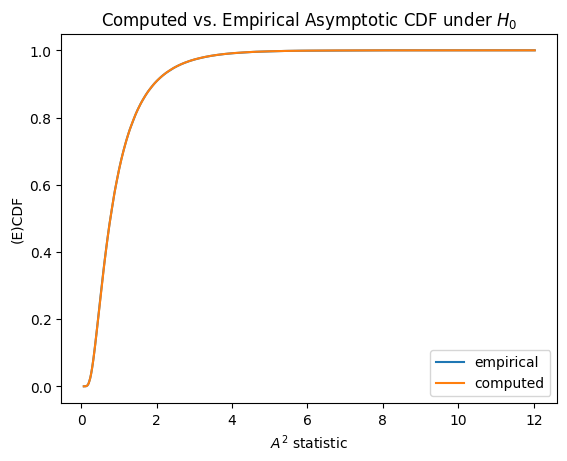

In [8]:
x = np.sort(statistics)
y_empirical = np.linspace(0, 1, statistics.size, endpoint=False)
plt.plot(x, y_empirical, label='empirical')
x_subsample = np.append(x[::100], x[-1])
y_numerical = ad_asymptotic_cdf(x_subsample, 5)
plt.plot(x_subsample, y_numerical, label='computed')
plt.xlabel(r'$A^2$ statistic')
plt.ylabel('(E)CDF')
plt.title(r'Computed vs. Empirical Asymptotic CDF under $H_0$')
plt.legend()
plt.show()

In [9]:
%timeit ad_asymptotic_cdf(3, 5)

1.32 ms ± 1.86 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
z = np.linspace(1, 10, 100) # 100 values vectorized
%timeit ad_asymptotic_cdf(z, 5)

42.3 ms ± 99.2 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Rescaling

In [2]:
dist = scipy.stats.uniform()
true_n = 50_000
samples = np.sort(dist.rvs((true_n, 2000)), axis=0)
subsamples = samples[::5]
statistics = compute_adstat(samples, dist.cdf)
naive_subsampled_statistics = compute_adstat(subsamples, dist.cdf)
adjusted_subsampled_statistics = compute_adstat(subsamples, dist.cdf, true_n)
print(np.mean(statistics <= .5))
print(np.mean(naive_subsampled_statistics <= .5))
print(np.mean(adjusted_subsampled_statistics <= .5))
print(ad_asymptotic_cdf(.5))

0.2395
0.957
0.2375
0.25318562646965553


(array([850., 676., 260., 125.,  38.,  23.,  15.,   7.,   4.,   2.]),
 array([0.14694601, 0.72725217, 1.30755832, 1.88786448, 2.46817064,
        3.04847679, 3.62878295, 4.20908911, 4.78939526, 5.36970142,
        5.95000758]),
 <BarContainer object of 10 artists>)

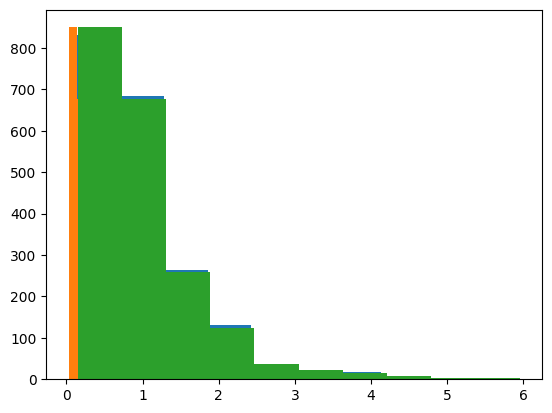

In [3]:
bins = bins = np.arange(0, 6.1, .2)
plt.hist(statistics)
plt.hist(naive_subsampled_statistics)
plt.hist(adjusted_subsampled_statistics)